Project overview:
This data science project aims to predict the age of individuals based on their multi-omics data. The dataset used includes gene expression data from different subtypes of cells that could represent specific biomarkers for age-related changes. The gene expressions such as RPA2, HOXC4, KLF14 and others are captured in numerical formats for different samples and provide a basis for extensive analysis and modeling approaches.
These predictions should not only contribute to a better understanding of the relationship between gene expression and ageing processes, but also help to identify important genetic markers that could be relevant for age-related diseases.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/Users/caner/Desktop/Data Science/AgeingprocessGeneexpression/data.csv'
data_df = pd.read_csv(data_path)

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RPA2_3     104 non-null    float64
 1   ZYG11A_4   104 non-null    float64
 2   F5_2       104 non-null    float64
 3   HOXC4_1    104 non-null    float64
 4   NKIRAS2_2  104 non-null    float64
 5   MEIS1_1    104 non-null    float64
 6   SAMD10_2   104 non-null    float64
 7   GRM2_9     104 non-null    float64
 8   TRIM59_5   104 non-null    float64
 9   LDB2_3     104 non-null    float64
 10  ELOVL2_6   104 non-null    float64
 11  DDO_1      104 non-null    float64
 12  KLF14_2    104 non-null    float64
 13  Age        104 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 11.5 KB


In [23]:
data_df.head(10)

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2,Age
0,65.96,18.08,41.57,55.46,30.69,63.42,40.86,68.88,44.32,56.17,62.29,40.99,2.30,76
1,66.83,20.27,40.55,49.67,29.53,30.47,37.73,53.30,50.09,58.40,61.10,49.73,1.07,59
2,50.30,11.74,40.17,33.85,23.39,58.83,38.84,35.08,35.90,58.81,50.38,63.03,0.95,41
3,65.54,15.56,33.56,36.79,20.23,56.39,41.75,50.37,41.46,58.05,50.58,62.13,1.99,54
4,59.01,14.38,41.95,30.30,24.99,54.40,37.38,30.35,31.28,65.80,48.74,41.88,0.90,33
5,81.30,14.68,35.91,50.20,26.57,32.37,32.30,55.19,42.21,70.15,61.36,33.62,1.87,55
6,58.07,18.40,40.41,40.44,20.42,41.29,43.78,20.06,38.36,63.45,51.52,57.68,1.25,38
7,58.11,24.58,32.84,54.21,21.08,29.35,30.96,44.67,53.84,57.26,73.85,49.15,4.18,53
8,76.61,22.13,32.07,53.67,24.99,16.48,27.86,69.81,54.41,48.23,63.84,44.54,4.73,56
9,64.47,11.97,47.64,49.14,25.42,57.06,42.25,35.50,40.97,64.40,50.56,73.24,3.43,66


In [24]:
data_df.tail(10)

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2,Age
94,60.33,12.96,40.07,43.65,25.00,55.58,32.76,38.51,45.40,60.27,59.04,60.34,6.72,56
95,66.39,19.79,35.59,52.15,24.86,34.32,40.46,51.84,50.96,56.46,65.91,36.37,5.64,56
96,64.59,14.53,30.11,52.06,22.11,22.34,26.37,48.00,48.23,56.39,56.22,51.50,2.63,38
97,74.16,22.66,29.36,48.54,21.60,30.58,33.72,56.90,52.96,48.51,71.95,31.68,3.28,50
98,57.85,11.32,45.51,35.93,26.41,51.00,35.86,39.30,35.29,74.82,47.07,72.90,1.52,54
99,58.69,18.35,44.93,47.38,28.52,27.93,36.91,38.85,43.60,66.52,50.38,61.35,2.36,50
100,63.83,12.09,41.90,44.60,24.75,39.18,36.72,59.16,47.58,61.89,56.56,46.96,2.32,55
101,74.61,24.72,31.47,56.47,27.28,20.12,29.83,65.22,54.89,43.36,68.69,16.45,6.54,48
102,66.44,20.96,34.99,55.25,23.77,49.99,36.05,73.52,51.74,49.90,67.48,36.06,4.22,68
103,49.13,12.58,46.85,37.69,27.03,57.83,32.56,30.09,40.35,66.59,51.18,33.94,2.30,36


In [25]:
data_df.describe()

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2,Age
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,64.084904,17.505577,38.720288,45.928173,25.547788,44.683462,35.577115,44.219519,44.615865,57.925962,57.010192,47.112885,3.060096,50.346154
std,7.767960,5.624528,6.326932,8.808673,4.580109,14.012354,5.827275,17.924960,8.764742,9.885841,10.509354,12.831242,2.020950,13.498486
min,46.200000,6.220000,27.850000,27.270000,14.590000,16.480000,23.150000,5.400000,24.320000,36.200000,34.260000,16.450000,0.540000,20.000000
25%,58.967500,14.072500,34.017500,39.200000,22.042500,32.617500,31.107500,29.985000,37.147500,50.282500,50.042500,38.967500,1.502500,38.750000
50%,64.455000,17.000000,37.665000,47.280000,25.045000,44.520000,35.490000,44.590000,44.100000,58.290000,58.635000,46.890000,2.530000,50.000000
75%,70.102500,21.020000,42.920000,52.812500,28.537500,55.482500,39.532500,57.892500,50.630000,65.435000,65.112500,55.770000,4.237500,59.000000
max,85.480000,37.090000,51.440000,68.120000,38.540000,76.730000,50.390000,82.090000,67.920000,81.780000,76.800000,82.150000,9.230000,80.000000


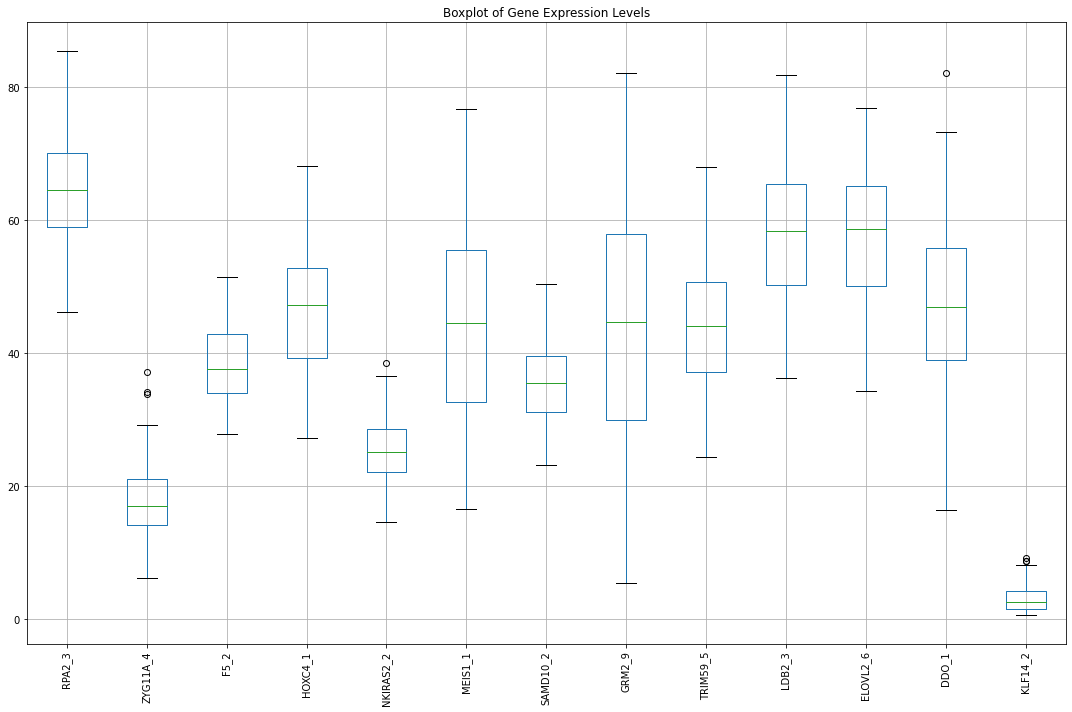

In [26]:
plt.figure(figsize=(15, 10))
data_df.drop(columns=['Age'], inplace=True)
data_df.boxplot()
plt.title('Boxplot of Gene Expression Levels')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()